# TODO: 
# REVERT BINARY LABELS ENTIRELY TO LOOK FOR IMPROVEMENT IN TEST DATA ACCURACY

In [1]:
import numpy as np
import nibabel as nib
import os
import tensorflow as tf
from PIL import Image
import PIL
import skimage.transform as skTrans

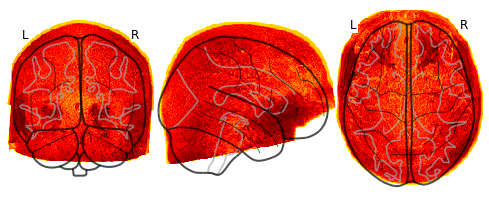

In [5]:
from nilearn import plotting
plotting.plot_glass_brain("6anat.nii.gz")# test image for visualization   

In [2]:
aut_path = "DATASET\\AUTISTIC_TRAIN\\"
cnt_path = "DATASET\\CONTROL_TRAIN\\"

In [9]:
test_aut_path = "DATASET\\AUTISTIC_VAL\\"
test_cnt_path = "DATASET\\CONTROL_VAL\\"

In [10]:
def to_arr(path):
    return np.array(nib.load(path).dataobj)

In [11]:
len(os.listdir(cnt_path))

80

In [12]:
labels = []
for i in range(len(os.listdir(aut_path))):
    labels.append([1])
for i in range(len(os.listdir(cnt_path))):
    labels.append([0])
labels = np.array(labels)

In [14]:
labels.shape

(160, 1)

In [8]:
auts = []
cnts = []

for i in os.listdir(aut_path):
    im = nib.load(aut_path+i).get_fdata()
    r = skTrans.resize(im, (150,200,150), order=1, preserve_range=True)#.reshape(150,200,150,1)
    print(i)
    auts.append(r)
for i in os.listdir(cnt_path): 
    im = nib.load(cnt_path+i).get_fdata()
    r = skTrans.resize(im, (150,200,150), order=1, preserve_range=True)#.reshape(150,200,150,1)
    print(i)
    cnts.append(r)

10anat.nii.gz
11anat.nii.gz
12anat.nii.gz
13anat.nii.gz
14anat.nii.gz
15anat.nii.gz
16anat.nii.gz
17anat.nii.gz
18anat.nii.gz
19anat.nii.gz
1anat.nii.gz
20anat.nii.gz
21anat.nii.gz
22anat.nii.gz
23anat.nii.gz
24anat.nii.gz
25anat.nii.gz
26anat.nii.gz
27anat.nii.gz
28anat.nii.gz
29anat.nii.gz
2anat.nii.gz
30anat.nii.gz
31anat.nii.gz
32anat.nii.gz
33anat.nii.gz
34anat.nii.gz
35anat.nii.gz
36anat.nii.gz
37anat.nii.gz
38anat.nii.gz
39anat.nii.gz
3anat.nii.gz
40anat.nii.gz
41anat.nii.gz
42anat.nii.gz
43anat.nii.gz
44anat.nii.gz
45anat.nii.gz
46anat.nii.gz
47anat.nii.gz
48anat.nii.gz
49anat.nii.gz
4anat.nii.gz
50anat.nii.gz
51anat.nii.gz
52anat.nii.gz
53anat.nii.gz
54anat.nii.gz
55anat.nii.gz
56anat.nii.gz
57anat.nii.gz
58anat.nii.gz
59anat.nii.gz
5anat.nii.gz
60anat.nii.gz
61anat.nii.gz
62anat.nii.gz
63anat.nii.gz
64anat.nii.gz
65anat.nii.gz
66anat.nii.gz
67anat.nii.gz
68anat.nii.gz
69anat.nii.gz
6anat.nii.gz
70anat.nii.gz
71anat.nii.gz
72anat.nii.gz
73anat.nii.gz
74anat.nii.gz
75anat.nii.g

In [15]:
auts = np.array(auts)
cnts = np.array(cnts)

In [16]:
auts.shape

(80, 150, 200, 150)

In [17]:
cnts.shape

(80, 150, 200, 150)

In [18]:
images = np.concatenate([auts, cnts])

In [19]:
images.shape

(160, 150, 200, 150)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1( l=0.03),
                           input_shape=(150, 200, 150)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (2,2), padding='same', activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1( l=0.03)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [47]:
BATCH_SIZE = 8

In [48]:
dataset = tf.data.Dataset.from_tensor_slices( ( images, labels ) )   # tf.constant() does not change error
dataset = dataset.repeat().batch(BATCH_SIZE)

In [49]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 200, 32)      43232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 100, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 100, 64)       8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 50, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 118400)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                7577664   
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

In [52]:
model.fit(dataset, epochs=5, steps_per_epoch= 160/BATCH_SIZE)

Epoch 1/5
20/20 [==============================] - 21s 1s/step - loss: 865056.1250 - accuracy: 0.8750
Epoch 2/5
20/20 [==============================] - 20s 1s/step - loss: 1950901.3750 - accuracy: 0.6250
Epoch 3/5
20/20 [==============================] - 21s 1s/step - loss: 1936310.2500 - accuracy: 0.4625
Epoch 4/5
20/20 [==============================] - 21s 1s/step - loss: 188539.7188 - accuracy: 0.7437
Epoch 5/5
20/20 [==============================] - 20s 1s/step - loss: 285212.8125 - accuracy: 0.3625


In [53]:
aut_test = []
cnt_test = []

In [54]:
for i in os.listdir(test_aut_path):
    im = nib.load(test_aut_path+i).get_fdata()
    r = skTrans.resize(im, (150,200,150), order=1, preserve_range=True)#.reshape(150,200,150,1)
    print(i)
    aut_test.append(r)
for i in os.listdir(test_cnt_path): 
    im = nib.load(test_cnt_path+i).get_fdata()
    r = skTrans.resize(im, (150,200,150), order=1, preserve_range=True)#.reshape(150,200,150,1)
    print(i)
    cnt_test.append(r)

100anat.nii.gz
158anat.nii.gz
81anat.nii.gz
82anat.nii.gz
83anat.nii.gz
84anat.nii.gz
85anat.nii.gz
86anat.nii.gz
87anat.nii.gz
88anat.nii.gz
89anat.nii.gz
90anat.nii.gz
91anat.nii.gz
92anat.nii.gz
93anat.nii.gz
94anat.nii.gz
95anat.nii.gz
96anat.nii.gz
97anat.nii.gz
98anat.nii.gz
99anat.nii.gz
100anat.nii.gz
272anat.nii.gz
81anat.nii.gz
82anat.nii.gz
83anat.nii.gz
84anat.nii.gz
85anat.nii.gz
86anat.nii.gz
87anat.nii.gz
88anat.nii.gz
89anat.nii.gz
90anat.nii.gz
91anat.nii.gz
92anat.nii.gz
93anat.nii.gz
94anat.nii.gz
95anat.nii.gz
96anat.nii.gz
97anat.nii.gz
98anat.nii.gz
99anat.nii.gz


In [55]:
aut_test = np.array(aut_test)

In [56]:
aut_test.shape

(21, 150, 200, 150)

In [57]:
cnt_test = np.array(cnt_test)


In [58]:
cnt_test.shape

(21, 150, 200, 150)

In [59]:
c = 0;
for i in range(21):
    test = tf.data.Dataset.from_tensors( aut_test[i] )   # tf.constant() does not change error
    test = test.batch(1)
    r = model.predict(test)
    if np.argmax(r) == 0:
        c+=1
    print(i, np.argmax(r)==0)
print(c,'/', 21)

0 True
1 False
2 True
3 True
4 True
5 False
6 False
7 True
8 True
9 False
10 False
11 True
12 True
13 True
14 False
15 False
16 False
17 True
18 True
19 True
20 True
13 / 21


In [60]:
c = 0
for i in range(21):
    test = tf.data.Dataset.from_tensors( cnt_test[i] )   # tf.constant() does not change error
    test = test.batch(1)
    r = model.predict(test)
    if np.argmax(r) == 0:
        c+=1
    print(i, np.argmax(r)==0)
print(c, '/', 21)

0 False
1 False
2 True
3 False
4 True
5 False
6 False
7 False
8 False
9 True
10 True
11 True
12 True
13 False
14 False
15 False
16 True
17 True
18 False
19 False
20 True
9 / 21
